In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import genericio
from tqdm import tqdm #progress bar
import os #mkdir

In [2]:
# read in data for hash file
data_dir = '/home/isultan/data/LastJourney/Bighalop/STEP279/'
headers_fname = 'm000p-279.bighaloparticles#11'
fname = data_dir + headers_fname
x = genericio.gio_read(fname, 'x')[0]
y = genericio.gio_read(fname, 'y')[0]
z = genericio.gio_read(fname, 'z')[0]
fof_halo_tag = genericio.gio_read(fname, 'fof_halo_tag')[0]

data_arr = np.vstack( (fof_halo_tag,x,y,z) ).T

In [13]:
# identify largest halos (in terms of big haloi part.)
tags, tag_counts = np.unique(fof_halo_tag,return_counts=True)

In [14]:
idx_max = np.where(tag_counts==np.max(tag_counts))
tags[idx_max]
fof_halo_tag[fof_halo_tag==tags[idx_max]]

array([5987562875, 5987562875, 5987562875, ..., 5987562875, 5987562875,
       5987562875])

In [20]:
np.savetxt('bighalop_5987562875.csv', data_arr[data_arr[:,0]==5987562875,1:], delimiter=",", comments='', header='x,y,z')

In [21]:
halodat = np.copy(data_arr[data_arr[:,0]==5987562875,1:])

In [23]:
print halodat.shape
halodat[0]

(222657, 3)


array([  25.92899895, 2697.02416992, 3363.28613281])

In [24]:
x_ref, y_ref, z_ref = halodat[0]
halodat[:,0] += 3400*((halodat[:,0]-x_ref)<-1700) + -3400*((halodat[:,0]-x_ref)>1700)
halodat[:,1] += 3400*((halodat[:,1]-y_ref)<-1700) + -3400*((halodat[:,1]-y_ref)>1700)
halodat[:,2] += 3400*((halodat[:,2]-z_ref)<-1700) + -3400*((halodat[:,2]-z_ref)>1700)

In [25]:
halodat.shape

(222657, 3)

In [27]:
tags[np.argmax(tag_counts)]

5987562875

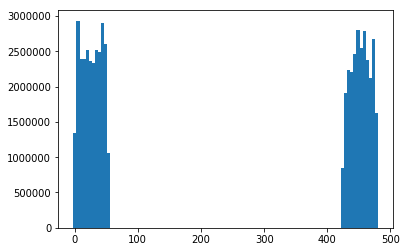

In [38]:
plt.hist(data_arr[:,1], bins = 100);

In [33]:
xbounds = (0, 500) 
ybounds = (0, 500)
zbounds = (3000, 3100)
subsection_arr = data_arr[ (data_arr[:,1] > xbounds[0]) & (data_arr[:,1] < xbounds[1]) & (data_arr[:,2] > ybounds[0]) & (data_arr[:,2] < ybounds[1]) & (data_arr[:,3] > zbounds[0]) & (data_arr[:,3] < zbounds[1]), :]

In [34]:
subsection_arr.shape

(2624378, 4)

In [35]:
np.savetxt('bighalop_279_subsection.csv', subsection_arr, delimiter=",", comments='', header='hid,x,y,z')

In [3]:
from pyevtk.hl import pointsToVTK
ndata_arr = data_arr[data_arr[:,0]==5987562875]
pointsToVTK("./data_arr", ndata_arr[:,1], ndata_arr[:,2], ndata_arr[:,3], data = None)

AssertionError: 

In [7]:
print ndata_arr.shape

(222657, 4)
